In [1]:
import geopandas as gpd
import cobra.postgres.interface as pgi
import cobra.utils.filehandling as fh
import cobra.utils.jobhandling as jh
import geopandas as gpd
import cobra.utils.geodatahandling as gdh

In [ ]:
fileman = fh.Filemanager()
jobman = jh.Jobmanager()

In [ ]:
#fileman.download_plain_file('https://download.geofabrik.de/europe/faroe-islands-latest.osm.pbf','Faroe')

In [ ]:
datasets = fileman.get_data(datatype='OSM PBF')
datasets.head()

In [ ]:
rbzddorf = datasets.iloc[0]

In [ ]:
jobman.create_import_job_from_dataset(rbzddorf, 'rbzddorf')

In [ ]:
jobman.get_jobs(df=True)

In [2]:
gdm = gdh.Geodatamanager()
gdm.get_tables()

,schema,table,estimate rows,geom columns
0,gis,planet_osm_polygon,32724,way
1,gis,planet_osm_roads,936,way
2,gis,planet_osm_point,35072,way
3,gis,planet_osm_line,24530,way
4,chaosdorf,gis_osm_pois_free_1,62797,wkb_geometry
5,faroer,planet_osm_point,35072,way
6,faroer,planet_osm_roads,936,way
7,faroer,planet_osm_polygon,32724,way
8,faroer,planet_osm_line,24530,way
9,rbzddorf,planet_osm_roads,66458,way


In [3]:
sql = 'SELECT osm.way AS geom, osm.* FROM rbzddorf.planet_osm_line osm WHERE power IS NOT NULL'

In [4]:
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
data = gpd.GeoDataFrame.from_postgis(sql, conn)

In [5]:
data.head()

,geom,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,...,tracktype,tunnel,water,waterway,wetland,width,wood,z_order,way_area,way
0,"LINESTRING (792922.900 6651518.524, 792845.121...",88127401,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F00002A000000FADAAFCCB53228415A92...
1,"LINESTRING (787956.347 6643418.456, 787984.133...",27219559,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F00000B0000004783D1B1E80B2841FE52...
2,"LINESTRING (789537.262 6643881.342, 789377.864...",470147596,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F00000D0000001FB93C8642182841B8DA...
3,"LINESTRING (792755.687 6651437.494, 793098.228...",88127409,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F0000020000000996A05F673128418C01...
4,"LINESTRING (793098.228 6652051.184, 792816.000...",92165142,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F0000040000006E6CB974143428415929...


In [ ]:
# Get Powerlines in Geopandas

In [6]:
power_lines = data[data['power'] == 'line']

In [7]:
power_lines.head()

,geom,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,...,tracktype,tunnel,water,waterway,wetland,width,wood,z_order,way_area,way
0,"LINESTRING (792922.900 6651518.524, 792845.121...",88127401,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F00002A000000FADAAFCCB53228415A92...
1,"LINESTRING (787956.347 6643418.456, 787984.133...",27219559,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F00000B0000004783D1B1E80B2841FE52...
3,"LINESTRING (792755.687 6651437.494, 793098.228...",88127409,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F0000020000000996A05F673128418C01...
4,"LINESTRING (793098.228 6652051.184, 792816.000...",92165142,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F0000040000006E6CB974143428415929...
5,"LINESTRING (792789.495 6651777.970, 792804.801...",88127405,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,0,None,0102000020110F000004000000B7492FFDAA312841D401...


In [8]:
power_lines.columns

Index(['geom', 'osm_id', 'access', 'addr:housename', 'addr:housenumber',
       'addr:interpolation', 'admin_level', 'aerialway', 'aeroway', 'amenity',
       'area', 'barrier', 'bicycle', 'brand', 'bridge', 'boundary', 'building',
       'construction', 'covered', 'culvert', 'cutting', 'denomination',
       'disused', 'embankment', 'foot', 'generator:source', 'harbour',
       'highway', 'historic', 'horse', 'intermittent', 'junction', 'landuse',
       'layer', 'leisure', 'lock', 'man_made', 'military', 'motorcar', 'name',
       'natural', 'office', 'oneway', 'operator', 'place', 'population',
       'power', 'power_source', 'public_transport', 'railway', 'ref',
       'religion', 'route', 'service', 'shop', 'sport', 'surface', 'toll',
       'tourism', 'tower:type', 'tracktype', 'tunnel', 'water', 'waterway',
       'wetland', 'width', 'wood', 'z_order', 'way_area', 'way'],
      dtype='object')

<AxesSubplot:>

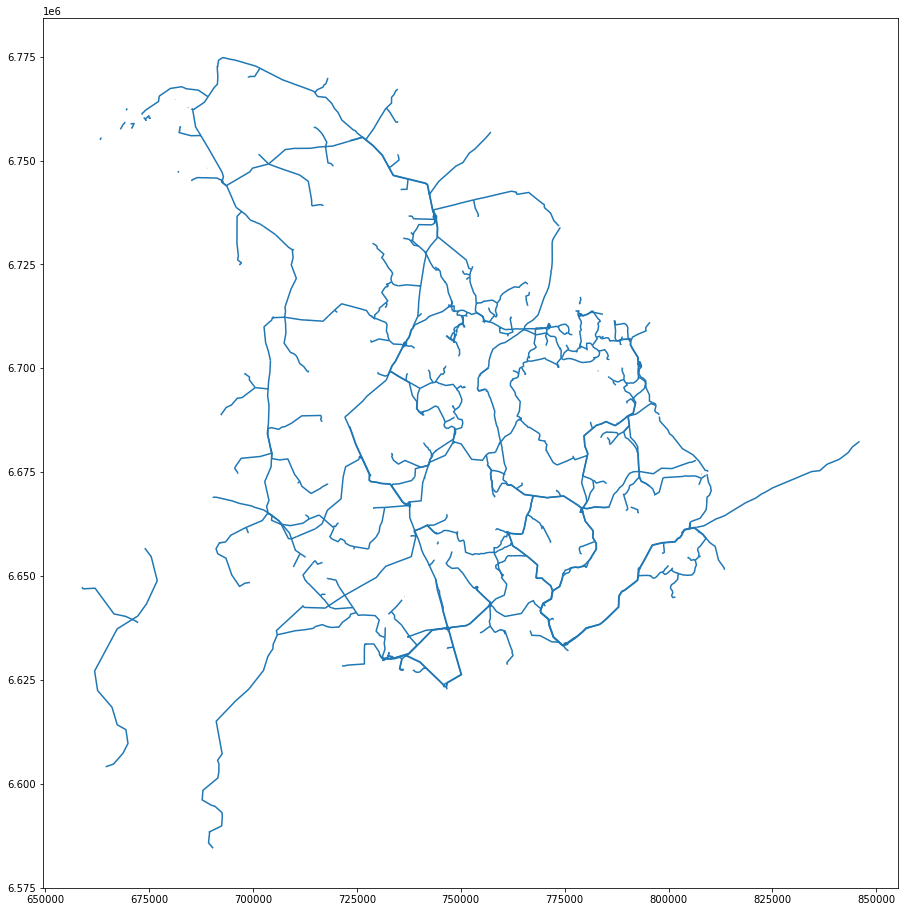

In [13]:
#power_lines.explore()
power_lines.plot(figsize=(16, 16))